# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [70]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
# !pip install pandas
# !pip install matplotlib 
# !pip install openpyxl

# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip
import pandas as pd,numpy as np, matplotlib.pyplot as plt, openpyxl, seaborn as sns

In [3]:
#On importe les données dans un dataframe
df_hist = pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [4]:
#On vérifie que le type des données attribué par pandas est cohérent
df_hist.dtypes

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [5]:
Liste_biens_immo = df_hist['type_local'].unique()

print("la liste des différents types de biens immobiliers que nous avons dans les données est :", Liste_biens_immo)

Code_et_biens = pd.unique(pd.concat([df_hist['code_type_local'],
                                     df_hist['type_local']]))
Code_et_biens

la liste des différents types de biens immobiliers que nous avons dans les données est : ['Appartement' 'Local industriel. commercial ou assimilé']


array([2, 4, 'Appartement', 'Local industriel. commercial ou assimilé'],
      dtype=object)

On observe 

qu'il y a deux types de biens, et que leurs codes types sont respectivement 2 et 4 pour les appartements et les locaux. 

### 3. Nombre de transactions

In [6]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est :' ,
      df_hist.shape[0], "transactions immobilières")
print()
print('le nombre de transactions pour les appartements dans les données est :', 
      df_hist.query("code_type_local == 2").shape[0], "Appartements")
print()
print('le nombre de transactions pour les locaux commerciaux dans les données est :',
      (df_hist['code_type_local']==4).sum(), "Locaux commerciaux")

le nombre de transactions dans les données est : 26196 transactions immobilières

le nombre de transactions pour les appartements dans les données est : 24353 Appartements

le nombre de transactions pour les locaux commerciaux dans les données est : 1843 Locaux commerciaux


### 4. interval de l'historique des données

In [7]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le :',
      min(df_hist['date_mutation']))
print()
print('la dernière date de transaction dans les données est le :',
      df_hist['date_mutation'].max())

la première date de transaction dans les données est le : 2017-01-02 00:00:00

la dernière date de transaction dans les données est le : 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [8]:
# Calcul de la colonne
df_hist['prix_metre_carre'] = round(
    df_hist['valeur_fonciere']/df_hist['surface_reelle'],
    2
)

# Vérification de la nouvelle variable calculée
df_hist.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_metre_carre
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [10]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_hist_Apt = df_hist.loc[df_hist['code_type_local'] == 2].drop(
    columns=['adresse_numero', 'adresse_nom_voie'])

# Vérification du nouveau dataset ne prenant que les appartements
df_hist_Apt.head()

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_metre_carre
0,2017-01-03,5.505597e+05,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


In [11]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements 
# par année avec la surface moyenne associée

# Création de la variable mettant l'accent sur l'année
df_hist_Apt['Annee'] = df_hist_Apt['date_mutation'].dt.year

# Calcul de la synthèse du prix au mètre carrée par année
Resultat_Apt = round(df_hist_Apt.groupby('Annee').agg(
    prix_moyen = pd.NamedAgg(column='prix_metre_carre', aggfunc='mean'),
    surface_moyen = pd.NamedAgg(column='surface_reelle', aggfunc='mean')
    )
    .reset_index(),
    2
)

# Affichage du résultat
Resultat_Apt

,Annee,prix_moyen,surface_moyen
0,2017,9492.86,44.63
1,2018,10031.40,44.27
2,2019,10562.71,43.36
3,2020,10674.87,42.90
4,2021,10455.60,43.48


On constate sur la moyenne des prix de vente des appartements à Paris semble décroître avec le temps.

Nous allons créer un graphique pour mieux le visualiser.

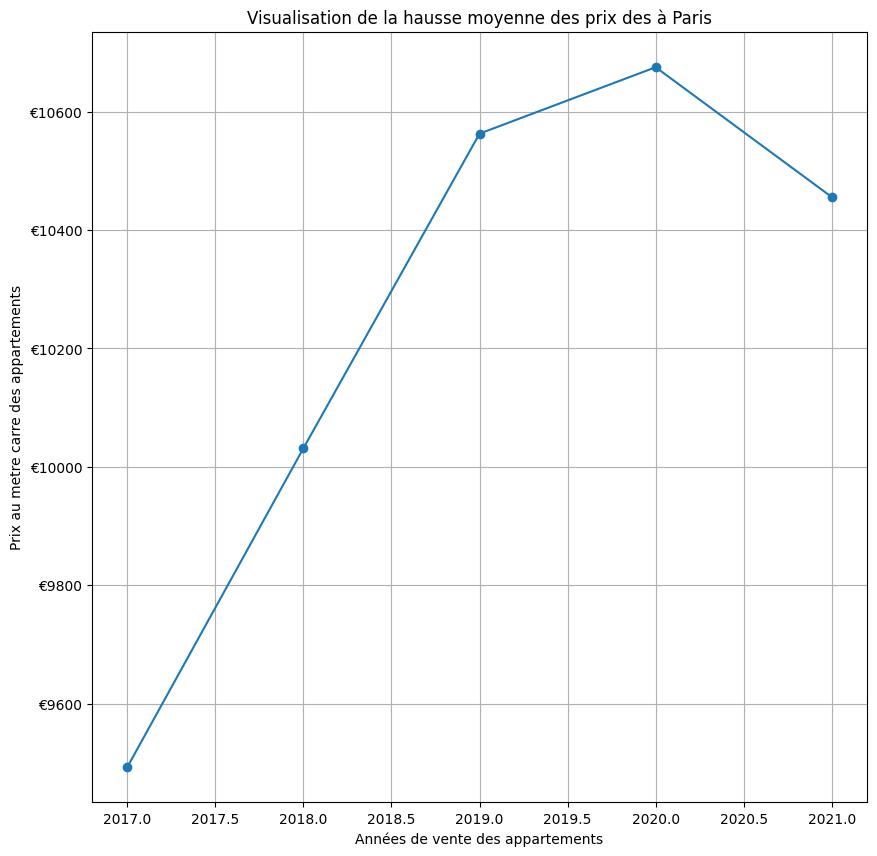

In [12]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
plt.plot(Resultat_Apt['Annee'], Resultat_Apt['prix_moyen'],
         marker = 'o', label = "Prix moyen de vente des appartements")
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [13]:
#Liste des codes postaux dans nos données.
df_hist_Apt['code_postal'].unique()

# On peut ajouter ".tolist()" au code au dessus pour avoir une présentation en vecteur  

array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002], dtype=int64)

In [18]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
Resultat_Apt_Postal = round(df_hist_Apt.groupby(['Annee', 'code_postal']).agg(
    prix_moyen = pd.NamedAgg(column='prix_metre_carre', aggfunc='mean'),
    surface_moyen = pd.NamedAgg(column='surface_reelle', aggfunc='mean')
    )
    .reset_index(),
    2
)

# Affichege du résultat du prix moyen par appartement et arrondissement
Resultat_Apt_Postal

,Annee,code_postal,prix_moyen,surface_moyen
0,2017,75001,11762.71,45.24
1,2017,75002,10920.13,43.09
2,2017,75003,11679.82,38.15
3,2017,75004,12407.23,40.94
4,2017,75005,11306.75,39.05
...,...,...,...,...
95,2021,75016,10790.31,67.95
96,2021,75017,10372.37,46.78
97,2021,75018,9665.64,37.66
98,2021,75019,8828.59,38.26


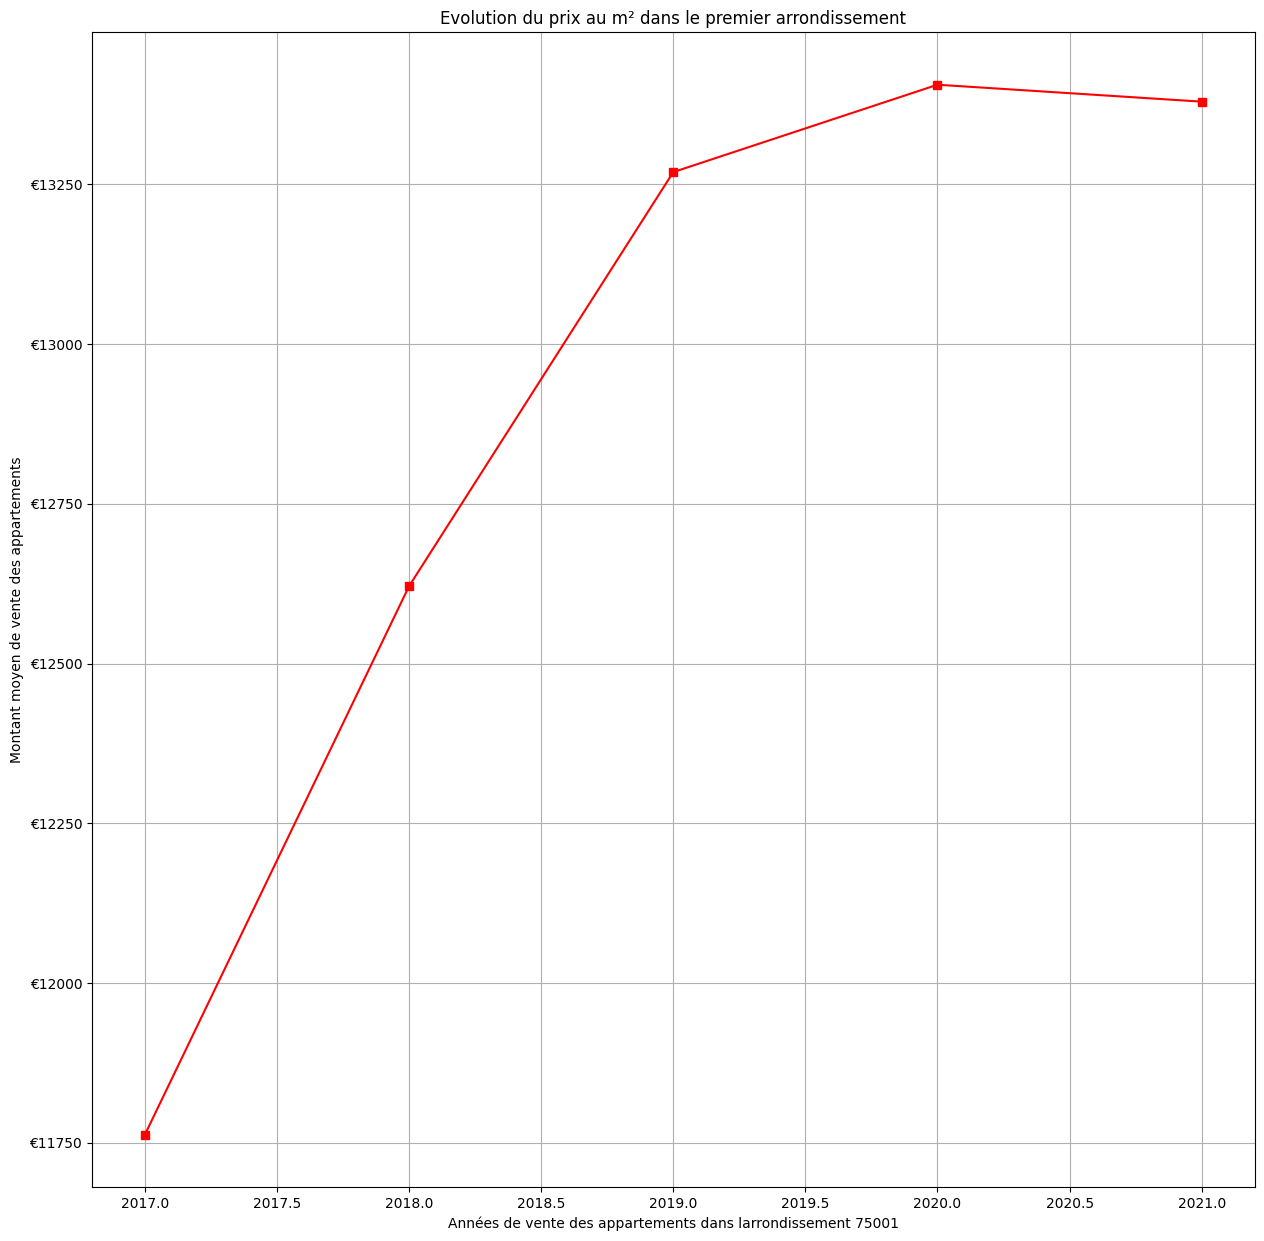

In [19]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au 
# metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
plt.plot(Resultat_Apt_Postal.loc[Resultat_Apt_Postal['code_postal'] == 75001]['Annee'],
         Resultat_Apt_Postal.loc[Resultat_Apt_Postal['code_postal'] == 75001]['prix_moyen'],
         color='red', marker = 's')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

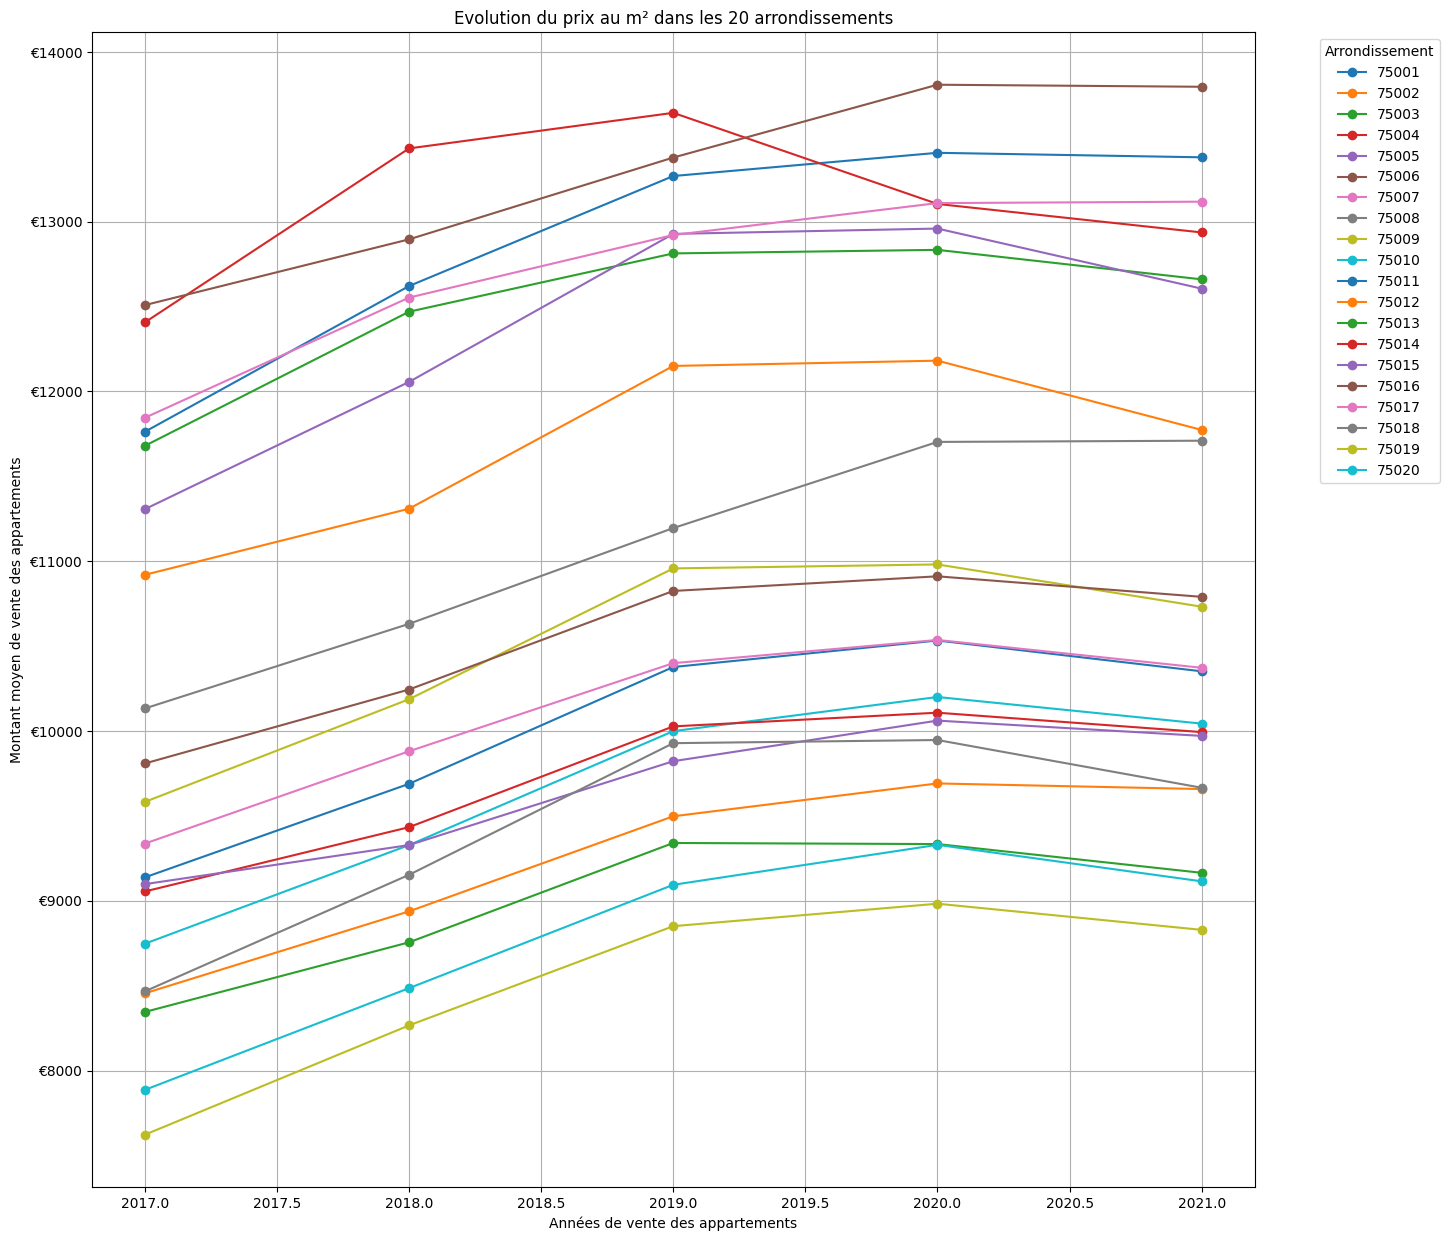

In [20]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous
for arrondissement in Resultat_Apt_Postal['code_postal'].unique():
    df = Resultat_Apt_Postal.loc[Resultat_Apt_Postal['code_postal'] == arrondissement, :]
    plt.plot(df['Annee'], df['prix_moyen'], label = arrondissement, marker = 'o')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(title = "Arrondissement", bbox_to_anchor = (1.05, 1) ,loc='upper left')
plt.show()

On observe que globalement une hausse des prix moyens des appartements. 

Toutefois cette hausse s'accompagne d'une légère baisse entre 2020 et 2021.

### 7. Prix au metre carré par transaction dans un arrondissement

In [23]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

print("le nombre total de transactions dans le 6ème arrondissement est :",
      df_hist_Apt.loc[df_hist_Apt['code_postal'] == 75006, :].shape[0])

print()

print("Résultat descrptif du nombre de transactions par année :"),

Stat_descrip_705006 = round(
          df_hist_Apt.loc[df_hist_Apt['code_postal'] == 75006, :].groupby('Annee').agg(
              Nbre_transaction = pd.NamedAgg(column= 'Annee', aggfunc= 'value_counts'), 
              Prix_moyen = pd.NamedAgg(column= 'prix_metre_carre', aggfunc= 'mean')
          )
          .reset_index(), 
          2
      )
      
 
print(Stat_descrip_705006)


le nombre total de transactions dans le 6ème arrondissement est : 709

Résultat descrptif du nombre de transactions par année :
   Annee  Nbre_transaction  Prix_moyen
0   2017               198    12508.84
1   2018               175    12896.28
2   2019               123    13378.07
3   2020               108    13807.09
4   2021               105    13795.05


On constate que une diminution des transactions et une hause du prix au mètre carré au cours des années. 

Cette situation pourrait sous-entendre une conjoncture du marché immobilier d'année en année ou encore la possibilité de garder un bien sur le long terme pour les propriétaires. 

On en conclut qu'il y a de moins en moins de ventes sur les biens de type appartement.

Affichons l'historique des transactions pour visualiser la dispersion des données :

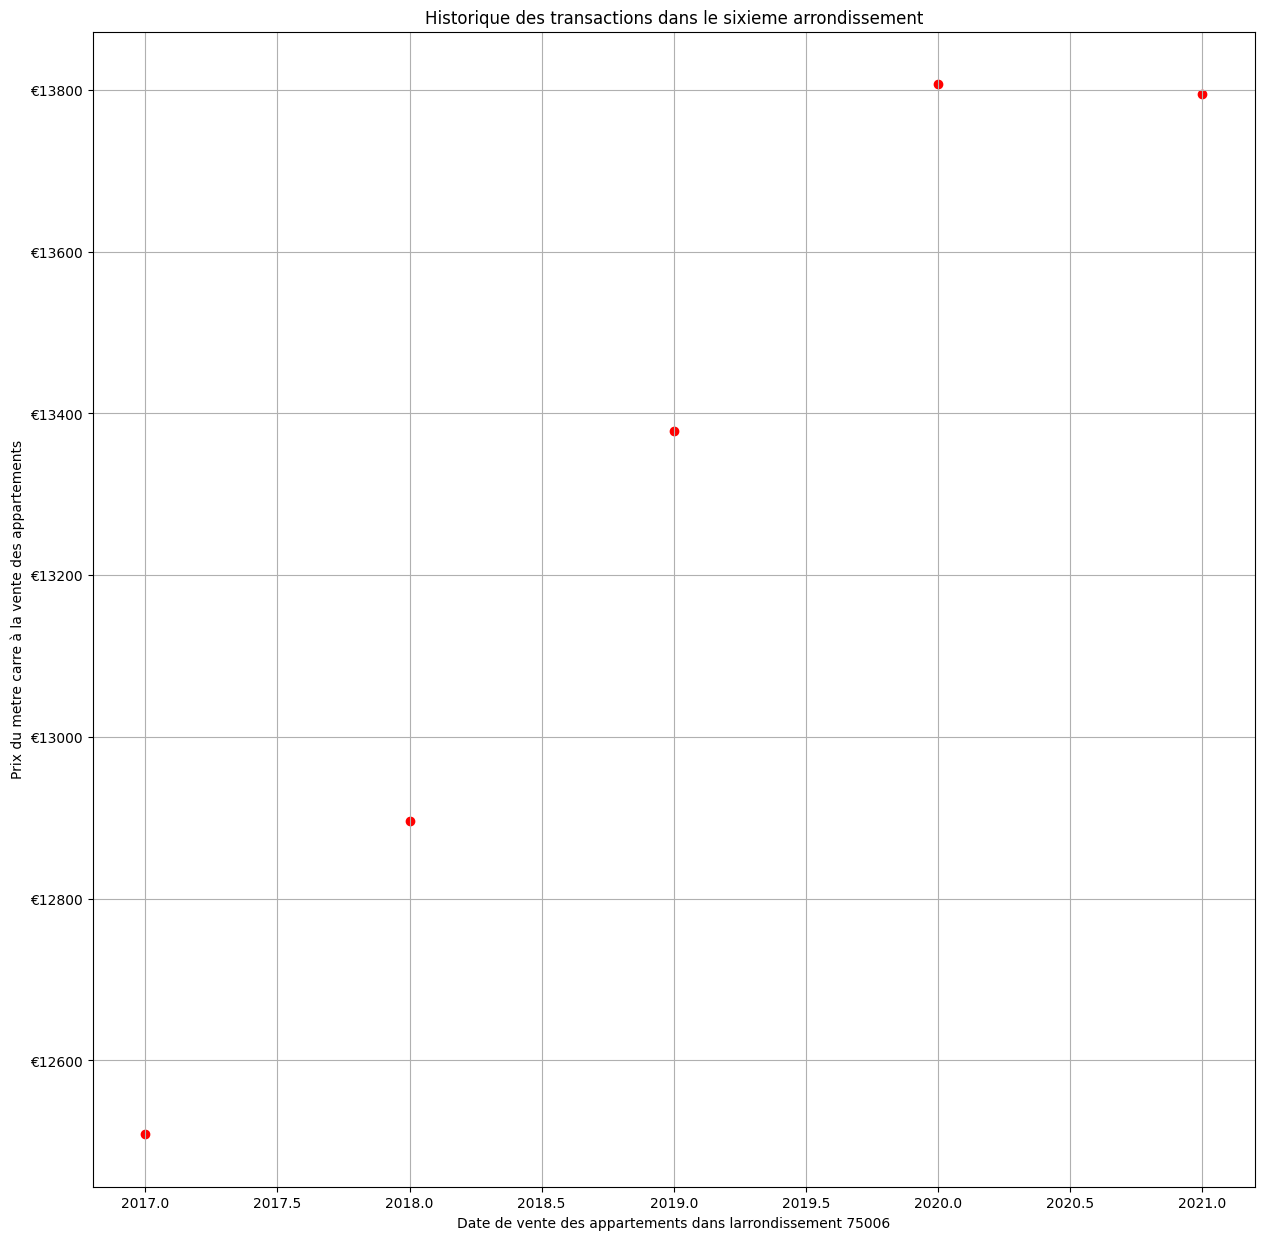

In [31]:
# Reproduction graphique de l'historique des transactions du sixième arrondissment : 
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot
plt.scatter(Stat_descrip_705006['Annee'],Stat_descrip_705006['Prix_moyen'],color = 'red')

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe l'augmentation du prix au mètre carré au cours du temps. 

Cette augmentation semble dessiner une ligne droite sauf entre 2020 et 2021 ce qui sous-entend l'existence d'une relation entre les deux variables. 

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [32]:
#On calcule la corrélation de Spearman
from scipy import stats

# Préparer le dataset pour qu'il contienne uniquement les variables nécessaires 
df_hist_75006 = df_hist_Apt.loc[df_hist_Apt['code_postal'] == 75006, :]

Subset = df_hist_75006.iloc[:, [7,8]]

# Calcul de la matrice de corrélation 
matrice_corr_spearman = Subset.corr(method= 'spearman')

# Affichage de la matrice 
print(matrice_corr_spearman)

# Conversion du Dataset en array numpy pour utiliser la fonction spearmanr
data = Subset.to_numpy()

# Calculer la corrélation de Spearman
corr, p_value = stats.spearmanr(data, axis=0)

# Affichaga des résultats 
print("Coefficient de correlation = ", corr)
print("p_value = ", p_value)

                  prix_metre_carre     Annee
prix_metre_carre          1.000000  0.897905
Annee                     0.897905  1.000000
Coefficient de correlation =  0.8979050516534398
p_value =  3.7733950921336845e-254


Le coefficient de corrélation est de 0,89 avec une pvalue de 3.77*10e-254 ~ 0 donc nous pouvons confirmer la corrélation.

L'observation du coefficient de corrélation semble comfirmer l'existante d'une forte relation linéaire entre le prix du m² et la date de transaction. 
En d'autres termes, il y a une tendance à ce que le prix par mètre carré augmente avec les années.
Les valeurs p associées sont très faibles. 
Cela signifie que la corrélation observée est statistiquement significative, ce qui renforce davantage l'idée d'une forte corrélation entre le prix par mètre carré et l'année.
Ces résultats suggèrent qu'il existe une forte corrélation positive entre le prix par mètre carré et l'année, et que cette corrélation est statistiquement significative.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [33]:
# Récupération des colonnes pour l'analyse 
Subset1 = df_hist_75006.iloc[:, [1,6]]

# Calcul de la matrice de corrélation 
matrice_corr_spearman1 = Subset1.corr(method= 'spearman')

# Affichage de la matrice 
print(matrice_corr_spearman1)

# Conversion du Dataset en array numpy pour utiliser la fonction spearmanr
data1 = Subset1.to_numpy()

# Calculer la corrélation de Spearman
corr1, p_value1 = stats.spearmanr(data1, axis=0)

# Affichaga des résultats 
print("Coefficient de correlation = ", corr1)
print("p_value = ", p_value1)

                 valeur_fonciere  surface_reelle
valeur_fonciere         1.000000        0.997769
surface_reelle          0.997769        1.000000
Coefficient de correlation =  0.9977685406899678
p_value =  0.0


Le coefficient de corrélation est de 0.99 avec une pvalue de 0. La relation est donc confirmée.

Le coefficient de corrélation est équivaut à 1 et la p_value est égale 0 donc la relation observée par l'intermédiaire du prix moyen au m² et la date de la transaction est confirmé.
Par déduction plus la prix de l'appartement augamente plus la surface réelle est importante.  

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [34]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_hist_Loc = df_hist[df_hist['code_type_local'] == 4].drop(columns=['adresse_numero', 'adresse_nom_voie'])

# Visualisation du dataset : 
df_hist_Loc.head()

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_metre_carre
18,2017-02-01,3.113277e+06,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.11
29,2017-02-17,1.164375e+06,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,12256.58
34,2017-02-20,3.802522e+05,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,12266.20
91,2017-03-09,3.623842e+05,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.01
109,2017-03-29,3.159072e+05,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,12636.29


In [35]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

# Création de la variable sur l'année 
df_hist_Loc['Annee'] = df_hist_Loc['date_mutation'].dt.year

# Statistique descriptive du prix au metre ² par année de vente 
Resultat_Loc = round(df_hist_Loc.groupby('Annee').agg(
    prix_moyen = pd.NamedAgg(column='prix_metre_carre', aggfunc= 'mean')
    ).reset_index(),
                                         2)

# Affichage du résultat
Resultat_Loc.head()

,Annee,prix_moyen
0,2017,10949.91
1,2018,11569.50
2,2019,11960.13
3,2020,11966.47
4,2021,12006.49


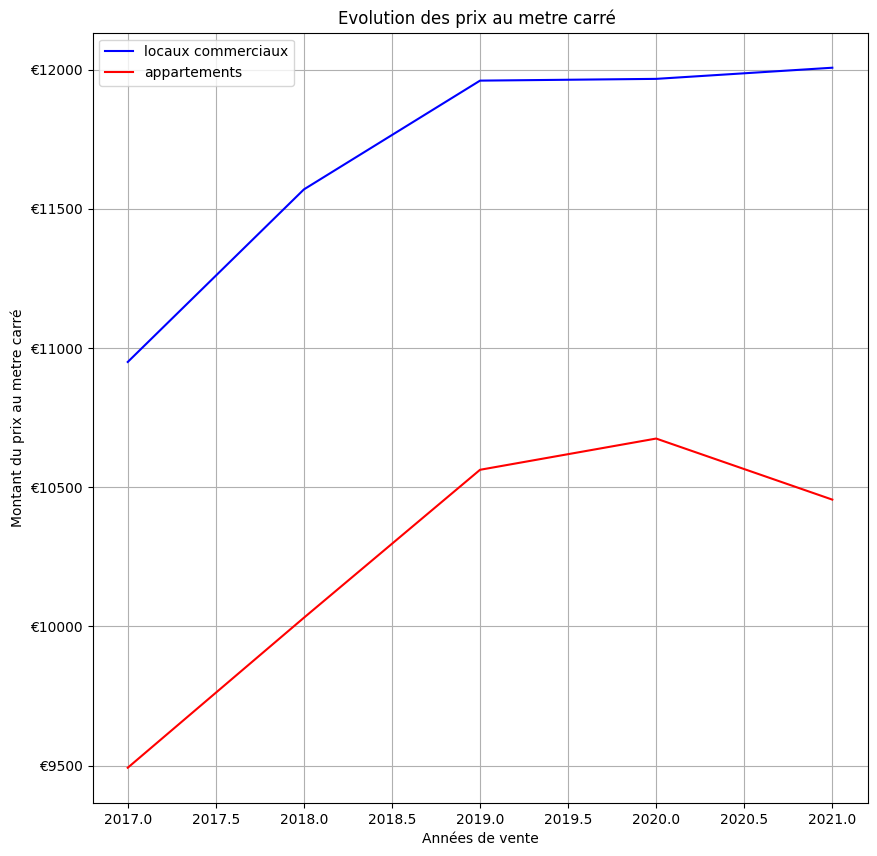

In [36]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(Resultat_Loc['Annee'], Resultat_Loc['prix_moyen'],label='locaux commerciaux',color='blue')
plt.plot(Resultat_Apt['Annee'], Resultat_Apt['prix_moyen'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est près 1000 € plus cher que celui des appartements

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [38]:
# Suppression des variables non importantes :
df_hist_T = df_hist.drop(columns=['date_mutation','adresse_numero', 'adresse_nom_voie', 'nom_commune', 'prix_metre_carre'],
                                    axis=1)

# Transformation des données catégorielles 
df_hist_Transf = pd.get_dummies(df_hist_T, columns= ['code_postal', 'type_local'], drop_first= True)

# Observation de la typologie des variables 
df_hist_Transf.dtypes

valeur_fonciere                                        float64
code_type_local                                          int64
surface_reelle                                           int64
code_postal_75002                                         bool
code_postal_75003                                         bool
code_postal_75004                                         bool
code_postal_75005                                         bool
code_postal_75006                                         bool
code_postal_75007                                         bool
code_postal_75008                                         bool
code_postal_75009                                         bool
code_postal_75010                                         bool
code_postal_75011                                         bool
code_postal_75012                                         bool
code_postal_75013                                         bool
code_postal_75014                                      

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [39]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split

# Précision des variables prédictrices et de la variable cible 
X = df_hist_Transf.drop('valeur_fonciere', axis= 1)
y = df_hist_Transf['valeur_fonciere']

# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.33,
                                                    random_state= 42
                                                    )

In [81]:
#conversion des données en str
#X_test = X_test.astype(str)
#X_train = X_train.astype(str)

Cette opération n'a pas été réalisée en raison de l'absence de sa pertimence.

En raison de la réalisation d'une régression linéaire

In [40]:
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
from sklearn.linear_model import LinearRegression

# Mise en place de insatnce 
Reg = LinearRegression()

# Excécution de l'entrainement de l'algorithme
Reg.fit(X_train, y_train)

# Excécution de la prédiction 
y_pred_test = Reg.predict(X_test)

# Afficher la prédiction 
print("Résultat de la prédiction est le suivant :")
print(y_pred_test)

# Affichage des métriques du modèle : 
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
print(f"RMSE : {mean_squared_error(y_test, y_pred_test)}")
print(f"MAPE : {mean_absolute_percentage_error(y_test, y_pred_test)}")


Résultat de la prédiction est le suivant :
[228593.32264742 294982.53481563 262491.29809182 ... 211946.67366459
 117158.82446015 337241.26286604]
RMSE : 6582013362.368098
MAPE : 0.098319730631791


Axes de développement pour analyser la performance du modèle de prédiction

In [41]:
# Score de prédiction du modèle 
Reg.score(X_test,y_pred_test)

1.0

Notre algorithme fait donc 9,8 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Construction de la métrique du R² : Evaluer si la variable cible est très bien expliquée par les variables prédictrices ;
- Détermination des coefficients multiplicateurs pour évaluer la variation des paramètres de l'équation de régression ;
- Ajouter une nouvelle variable prédictrice pour expliquer la variable cible ;
- ?

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [53]:
#On importe les données dans un dataframe
df_actifs = pd.read_excel("portefeuille_actifs+(3).xlsx")

# Affichage du dataset 
df_actifs.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [54]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

# Lister les variables nécessaires pour la suite de la prédiction 
df_actifs = df_actifs.drop(columns=['adresse_numero','adresse_nom_voie','nom_commune', 
                                    'surface_carrez', 'nombre_pieces_principales',
                                    'longitude', 'latitude', 'code_commune'])

# Transformation du dataset préparer 
df_actifs_Transf = pd.get_dummies(df_actifs, columns= [ 'code_postal','type_local'], drop_first= True)

# Renommer la variaable surface_relle_bati en surface_reelle
df_actifs_Transf = df_actifs_Transf.rename(columns={'surface_reelle_bati': 'surface_reelle'})

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

# df_actifs_Transf['timestamp'] = dt.datetime(year=2022, month=12, day=31)

df_actifs_Transf


,code_type_local,surface_reelle,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Local industriel. commercial ou assimilé
0,2,25,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,22,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,65,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,74,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2,22,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,4,16,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
271,4,15,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
272,4,35,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
273,4,49,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [26]:
#Conversion du dataframe en str


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [56]:
#On effectue la prédiction
y_pred = Reg.predict(df_actifs_Transf)

#On vérifie les 10 premières valeurs
y_pred[1:10]

array([315712.10953692, 773749.0419367 , 824386.92316862, 270481.79561539,
       408958.0775037 , 337016.15290435, 592068.63100273,  88513.27408722,
        92058.95115237])

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [59]:
# Portefeuille des particuluers 
y_pred_Apt = Reg.predict(df_actifs_Transf[df_actifs_Transf['code_type_local']==2])

# Portefeuille des corporates 
y_pred_Loc = Reg.predict(df_actifs_Transf[df_actifs_Transf['code_type_local']==4])

In [60]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions d euros):', f"{y_pred_Apt.sum():,.2f} €")


la valorisation du segment particulier est (en millions d euros): 63,159,515.08 €


In [61]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):', f"{y_pred_Loc.sum():,.2f} €")


la valorisation du segment corporate est (en millions deuros): 91,933,865.08 €


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment le plus prometteur dans le secteur de l'immobilier est celui des corporate ; 
- Limite : une perte d'un certain niveau d'information en raison de la décomposition d'une variable en plusieurs autres 

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [62]:
#On importe les données dans un dataframe
df_Ech = pd.read_excel("echantillon_a_classer2.xlsx")

df_Ech.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [63]:
# Création de la nouvelle variable sur les la prix du mètre carré 
df_Ech['prix_metre_carre'] = df_Ech['valeur_fonciere'] / df_Ech['surface_reelle']

# Suppression des variables : valeur foncière et surface réelle 
df_Ech = df_Ech.drop(columns=['valeur_fonciere', 'surface_reelle', 'nom_commune'])

# Affichage du nouveau dataset 
df_Ech.head()

,code_postal,prix_metre_carre
0,75019,9871.444128
1,75019,10045.572493
2,75019,9194.697790
3,75019,9469.142168
4,75019,7463.610005


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

Prix au m² le plus élevé : 7666.0717
Prix au m² le plus bas : 9194.697789863


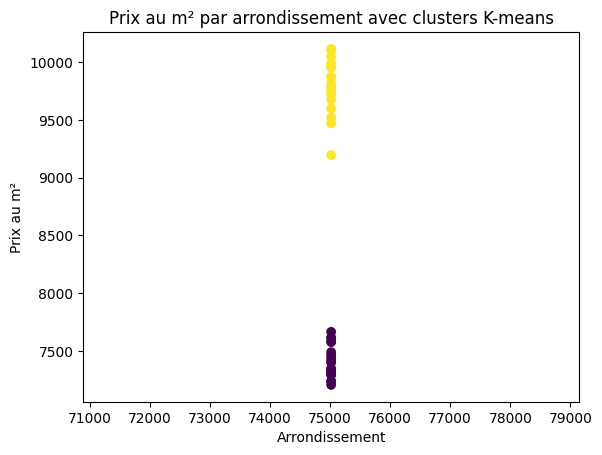

In [68]:
from sklearn.cluster import KMeans

# Préparation des données 
commune = df_Ech[['code_postal']]
prix_m2 = df_Ech[['prix_metre_carre']].values

# Précision du nombre de clusters
n_clusters = 2 

# Initialiser et ajuster le K-means
Kmeans = KMeans(n_clusters= n_clusters, random_state=0)
Kmeans.fit(prix_m2.reshape(-1, 1))

# Obtention des labels des clusters
labels = Kmeans.labels_

# Ajout des labels au DataFrame
df_Ech['cluster'] = labels

# Identification des prix les plus élevés (locaux) et plus bas (appartements)
prix_max = prix_m2[labels == 0].max()
prix_min = prix_m2[labels == 1].min()

# Afficher les résultats
print("Prix au m² le plus élevé :", prix_max)
print("Prix au m² le plus bas :", prix_min)

# Visualiser les données (facultatif)
import matplotlib.pyplot as plt

plt.scatter(x= commune, y= prix_m2, c=labels)
plt.xlabel("Arrondissement")
plt.ylabel("Prix au m²")
plt.title("Prix au m² par arrondissement avec clusters K-means")
plt.show()


In [69]:
# On vérifie les données de la prédiction
# Analyser les caractéristiques des clusters
cluster_stats = df_Ech.groupby(df_Ech['cluster'])['prix_metre_carre'].describe()
print(cluster_stats)

         count         mean         std         min          25%          50%  \
cluster                                                                         
0         20.0  7408.775030  141.329995  7207.21763  7304.332833  7374.091721   
1         20.0  9806.924674  232.955000  9194.69779  9705.214437  9842.717300   

                 75%           max  
cluster                             
0        7512.112911   7666.071700  
1        9979.592847  10113.195822  


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

    code_postal  prix_metre_carre                                   cluster
0         75019       9871.444128  Local industriel, commercial ou assimilé
1         75019      10045.572493  Local industriel, commercial ou assimilé
2         75019       9194.697790  Local industriel, commercial ou assimilé
3         75019       9469.142168  Local industriel, commercial ou assimilé
4         75019       7463.610005                               Appartement
5         75019       9982.016919  Local industriel, commercial ou assimilé
6         75019       9674.262777  Local industriel, commercial ou assimilé
7         75019       7348.917415                               Appartement
8         75019       9789.051438  Local industriel, commercial ou assimilé
9         75019       7616.420959                               Appartement
10        75019       7490.469041                               Appartement
11        75019       9518.076103  Local industriel, commercial ou assimilé
12        75

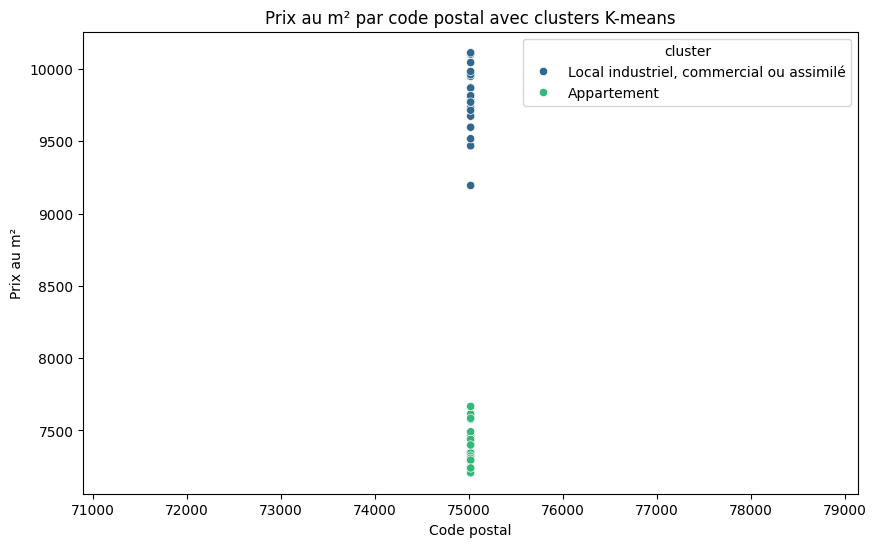

In [71]:
#On affiche les résultats
#On affiche les résultats
cluster_centers = Kmeans.cluster_centers_
if cluster_centers[0] > cluster_centers[1]:
    df_Ech['cluster'] = df_Ech['cluster'].replace({0: 'Local industriel, commercial ou assimilé', 1: 'Appartement'})
else:
    df_Ech['cluster'] = df_Ech['cluster'].replace({1: 'Local industriel, commercial ou assimilé', 0: 'Appartement'})

# Afficher les résultats mis à jour
print(df_Ech)

# Visualiser les données
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Ech, x= 'code_postal', y='prix_metre_carre', hue='cluster', palette='viridis')
plt.xlabel("Code postal")
plt.ylabel("Prix au m²")
plt.title("Prix au m² par code postal avec clusters K-means")
plt.show()

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- Le segment des biens corporate est plus avantageux  que le segment particulier avec plus de 25 millions de gains avec une marge d'erreur de 10 % ;
- La marge d'erreur d'explication de notre modèle avoisine les 10 % donc, nous devons optimiser ce dernier pour réduire le degré d'extrapolation des données 